<a href="https://colab.research.google.com/github/sachinrkp/JupyterNotebooks/blob/main/4_2_The_Iris_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Iris Problem**

*	Botanists require you to help them design an algorithm to identify flower types from 4 key measurements.In order to do this they need to identiy appropriate variables. 
*	The data is stored in iris.csv [here](https://drive.google.com/open?id=1_7ttss_S-I4mmLqWoMjOvwddWfAvAx5Q).
*	Give some univariate statistics to describe the data.
*	What should you do with the missing data?
* Which variables should you include in your analysis. Justify this.
*	Can you come up with a rules based algorithm to help the botanist?

The image below shows where the various varibles from the flower are measured and all measurements are in centimetres

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Flower.gif" width="370" height="220" align="center" hspace="80"/>

This project does not count for any marks towards your final mark. 

You will need to do a little research on python utilities to make this work. Pandas groupby function will be useful.

**What are we looking for?**

A google colab notebook with the following:
* The problem you are trying to solve
* An analysis of the data using one of the methods you were given from lecture 1. **You do not need to implement any other method and you will not receive extra marks for doing so.** In your analysis state clearly the assumptions you made and why you settled on your final model.
* Implement a train/test procedure. 
* Finally, submit your work in a PPT presentation on loop. 

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading the data

In [3]:
iris_df=pd.read_csv("sample_data/iris_data.csv")

In [4]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Understanding the Data

In [5]:
iris_df.describe

<bound method NDFrame.describe of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [6]:
iris_df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  149 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,149.000000,149.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,9.407333,3.057718,3.773826,1.199333,NaN
std,43.621311,0.437311,1.760543,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


checking duplicates

In [9]:
iris_df.duplicated().sum()

1

In [10]:
iris_df[iris_df.duplicated()]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
142,5.8,2.7,5.1,1.9,virginica


In [11]:
iris_df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

checking for missing values

In [12]:
iris_df.isnull().sum(axis=0)

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [13]:
iris_df.isnull()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [16]:
iris_df['Sepal.Width'] = iris_df['Sepal.Width'].interpolate(method='linear')
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
iris_df['Petal.Length'] = iris_df['Petal.Length'].interpolate(method='linear')
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
iris_df = iris_df.replace(to_replace=540, value=5.4)

In [19]:
iris_df.head(15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.40,0.2,setosa
1,4.9,3.0,1.40,0.2,setosa
2,4.7,3.2,1.30,0.2,setosa
3,4.6,3.1,1.50,0.2,setosa
4,5.0,3.6,1.40,0.2,setosa
5,5.4,3.9,1.70,0.4,setosa
6,4.6,3.4,1.40,0.3,setosa
7,5.0,3.4,1.50,0.2,setosa
8,4.4,2.9,1.40,0.2,setosa
9,4.9,3.1,1.50,0.1,setosa


In [20]:
iris_df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


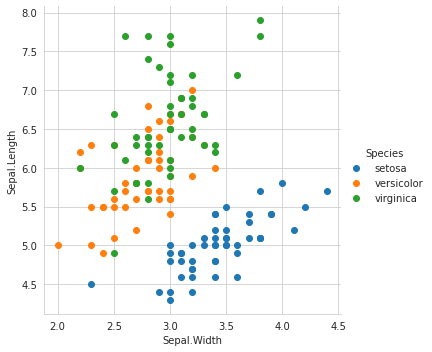

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(iris_df, hue="Species", size=5).map(plt.scatter, "Sepal.Width", "Sepal.Length").add_legend();
plt.show()

## with sepal.length and sepal.width we can easily differentiate between setosas from versicolor and virginica by drwaing a line
## but scatter plot wont be usefull to distinguish between versicolor and virginica as they are merging with each other
## with other combinations of columns as well we can distinguish setosa from other two species

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


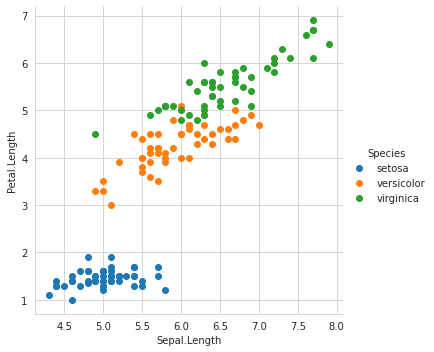

In [23]:
sns.set_style("whitegrid");
sns.FacetGrid(iris_df, hue="Species", size=5).map(plt.scatter, "Sepal.Length", "Petal.Length").add_legend();
plt.show()

## Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

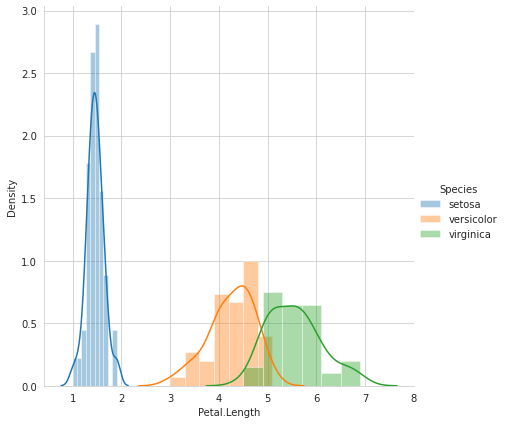

In [24]:
sns.FacetGrid(iris_df, hue="Species", size=6).map(sns.distplot, "Petal.Length").add_legend();
plt.show()

# from above we can see petal length of setosa in the range of 0.5 to 2.1 on x-axis
# petal length of versicolor and virginica are somewhat overlapping 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

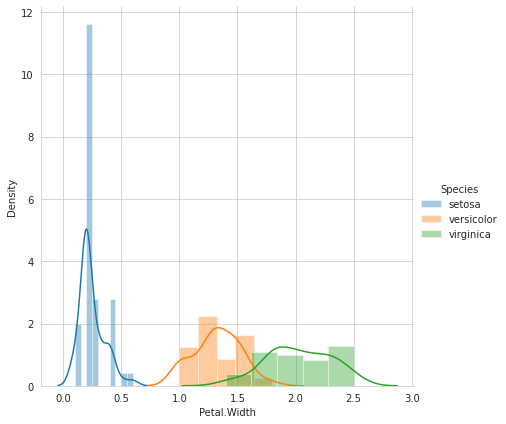

In [25]:
sns.FacetGrid(iris_df, hue="Species", size=6).map(sns.distplot, "Petal.Width").add_legend();
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

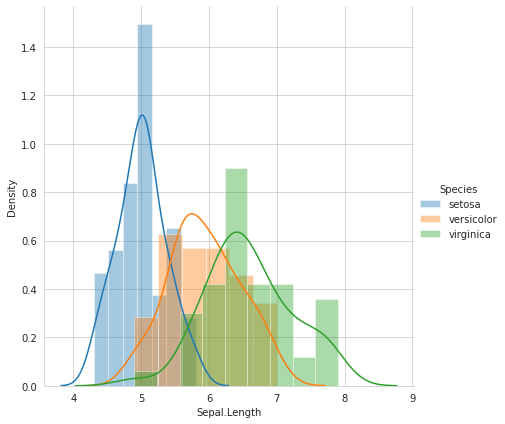

In [26]:
sns.FacetGrid(iris_df, hue="Species", size=6).map(sns.distplot, "Sepal.Length").add_legend();
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

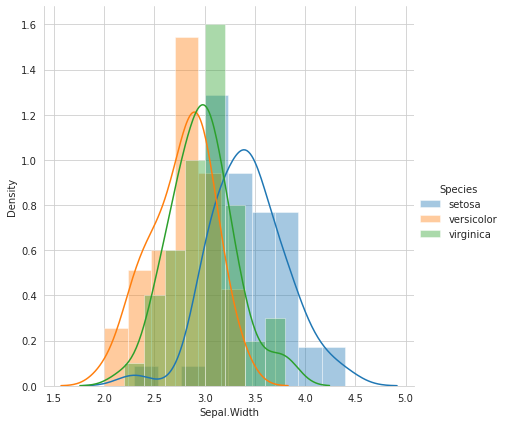

In [28]:
sns.FacetGrid(iris_df, hue="Species", size=6).map(sns.distplot, "Sepal.Width").add_legend();
plt.show()

# hence we are taking variable petal length as it is distinguishing the difference clearly

In [29]:
df_setosa = iris_df[iris_df['Species'] == 'setosa'].mean()
print(df_setosa['Petal.Length'].mean())

df_virginica = iris_df[iris_df['Species'] == 'virginica'].mean()
print(df_virginica['Petal.Length'].mean())

df_versicolor = iris_df[iris_df['Species'] == 'versicolor'].mean()
print(df_versicolor['Petal.Length'].mean())

1.4610000000000003
5.5520000000000005
4.26


<ipython-input-29-44445e059dbc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_setosa = iris_df[iris_df['Species'] == 'setosa'].mean()
<ipython-input-29-44445e059dbc>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_virginica = iris_df[iris_df['Species'] == 'virginica'].mean()
<ipython-input-29-44445e059dbc>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_versicolor = iris_df[iris_df['Species'] == 'versicolor'].mean()


# mean of petal lengths of all three species are
# setosa = 1.463
# virginica = 5.552
# versicolor = 4.26

# from this we can say that majority of petal lengths for setosas are merged at around 1.46 as seen in above histogram (1st one)
# the spread for setosa is between 0.5 to 2.1 and no other species are coinciding with setosa 
# so we can say that if petal length lies in this range the flower is setosa

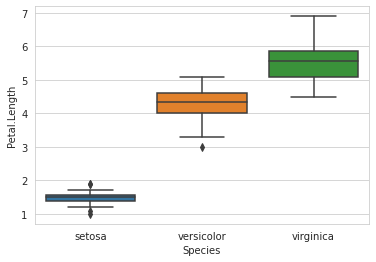

In [30]:
sns.boxplot(x='Species', y='Petal.Length', data=iris_df)
plt.show()

# from above we can see that 25% of versicolor data overlapping with 25% of virginica

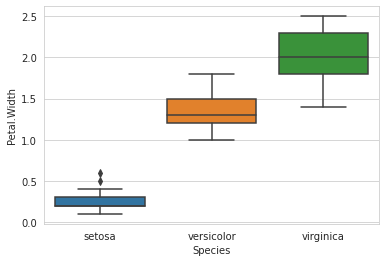

In [31]:
sns.boxplot(x='Species', y='Petal.Width', data=iris_df)
plt.show()

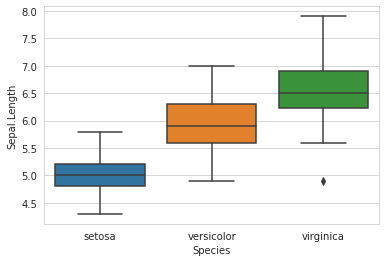

In [32]:
sns.boxplot(x='Species', y='Sepal.Length', data=iris_df)
plt.show()

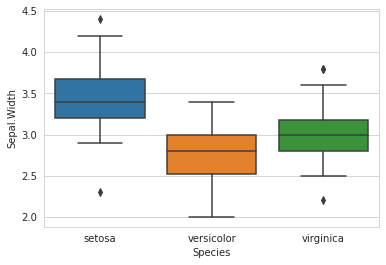

In [33]:
sns.boxplot(x='Species', y='Sepal.Width', data=iris_df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


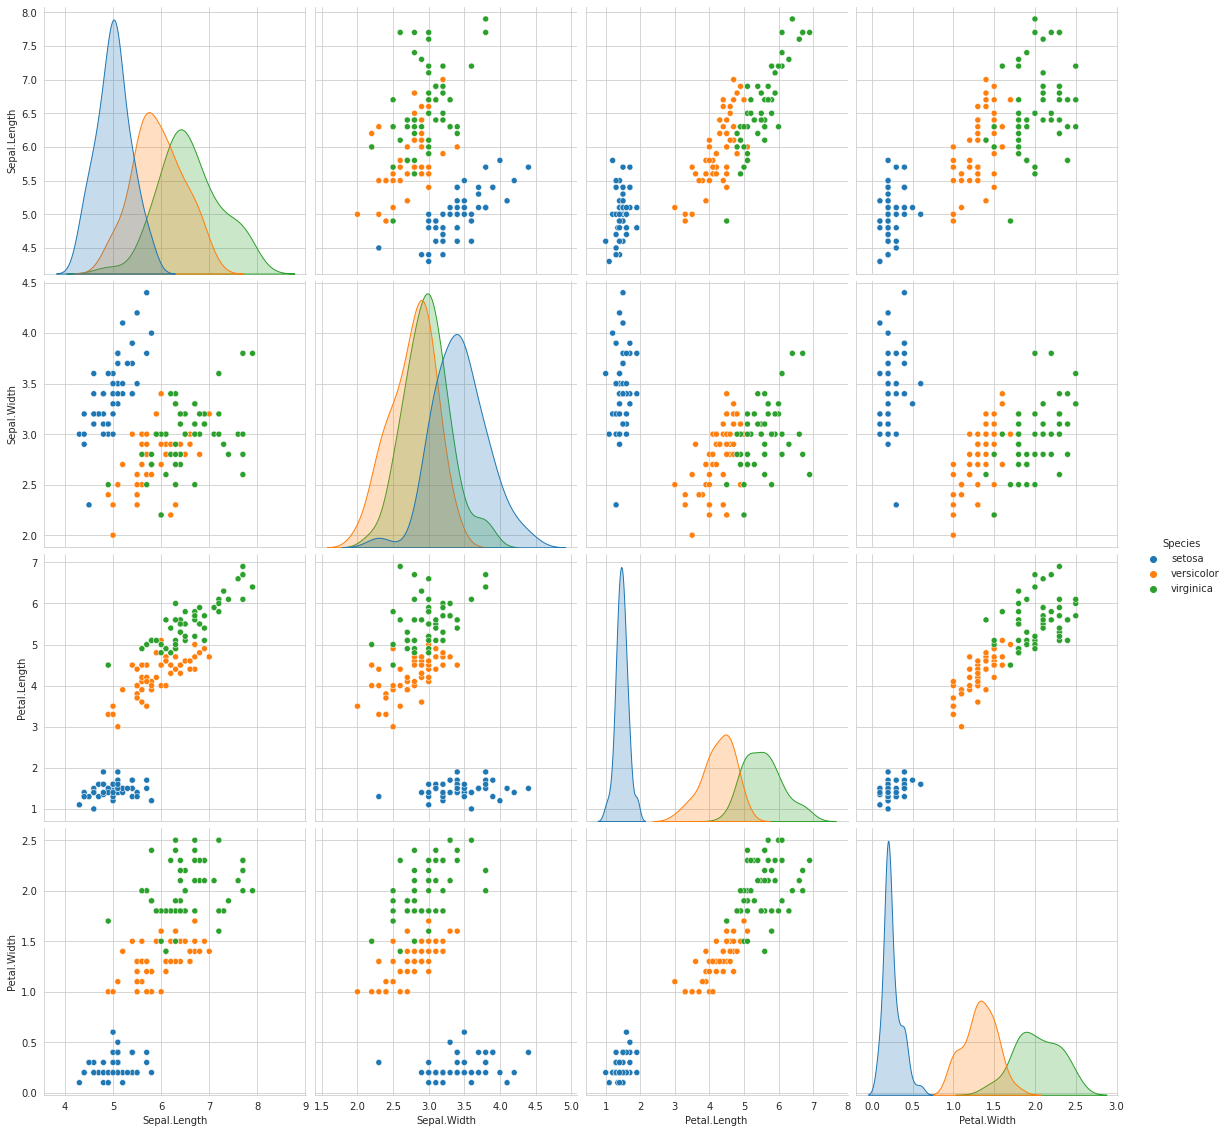

In [34]:
sns.set_style("whitegrid");
sns.pairplot(iris_df, hue="Species", size=4);
plt.show()

# Petal length is useful attribute in this case to differentiate and still we cannot completely separate the virginica and versicolor from each other
# As we are not using any model or specific method we could differentiate them by using some lines and if-else code